# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

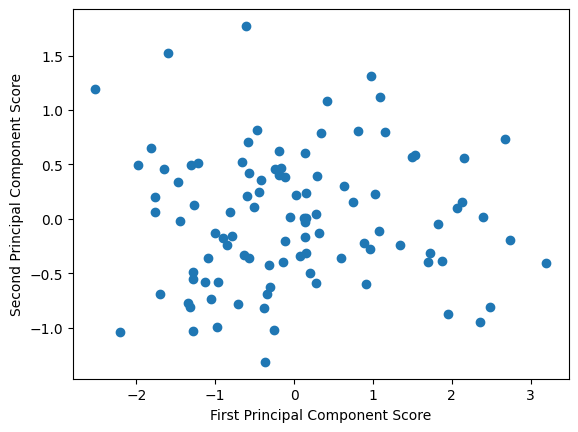

In [13]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

WEEKLY GRAPH QUESTION RESPONSE

- First principal component (PC1) score is low (because upper left means negative x-axis); Second principal component      (PC2) score is high (because upper left means positive y-axis).
- series_2 is very strongly correlated to series_1 with a small noise ; series_3 is related to series_1 but with much higher noise
- PC1 explains most variance (~80-90%) and aligns roughly with the shared variation between series_1 and series_2; PC2 explains less variance and is largely driven by differences between series_3 and the others.

- Low PC1 score (far left):
  Since PC1 captures the common signal in series_1 and series_2, a low PC1 score means these points have low values in both series_1 and series_2 together.
- High PC2 score (far up):
  PC2 mainly captures variation orthogonal to PC1, often related to differences in series_3. A high PC2 means series_3 is relatively high compared to series_1 and series_2 for those points.

- series_1 and series_2 are very strongly correlated (nearly proportional with small noise), so PCA treats them almost as one combined variable; their relative difference is tiny, so PC2 and PC3 mainly capture noise or subtle deviations.
- Thus, PCA cannot easily distinguish relative values of series_1 and series_2 individually because they move almost in lockstep; series_3, having larger noise, behaves more independently, contributing more to PC2 and PC3.

- series_1 and series_2 are nearly linearly dependent; series_2 ≈ series_1 × (1 + very small noise).
- This near-collinearity means PCA will have a principal component vector that mostly represents their shared variance.
- The second PC can barely separate them since the difference between the two is tiny relative to their combined variance.

PAIR PLOT FOR ALL THREE SERIES
- series_1 vs series_2 would show a tight, nearly linear cluster.
- series_3 vs either series_1 or series_2 would show more scatter due to the larger noise.
- The pairplot helps visually confirm the strong correlation between series_1 and series_2 and the looser relationship with series_3.

PCA SCATTERPLOT ADVANTAGES AND DISADVANTAGES
- Advantages:
     - Reduces 3D data into 2D, summarizing major sources of variance.
     - Reveals outliers and clusters effectively.
     - Highlights how series_3 behaves differently (via PC2), especially for the outliers.
     - Helps identify correlated variables and redundant information (series_1 and series_2 are almost redundant).
- Disadvantages:
     - Hard to interpret individual original variables (series_1 vs series_2) from PCA scores alone because PCA is a linear combination.
     - The first two PCs might not capture all subtle differences; some info lies in PC3.
     - Interpretation relies on knowing how PCs relate to the original variables (which can be tricky).
     - The outliers are identified but PCA alone doesn’t explain the exact reasons without deeper domain knowledge.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# DATASET EXERCISES - POLLUTION / AIR QUALITY DATASET (Kaggle)

df = pd.read_csv('updated_pollution_dataset.csv')

print(df.head())
print(df.info())

   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature

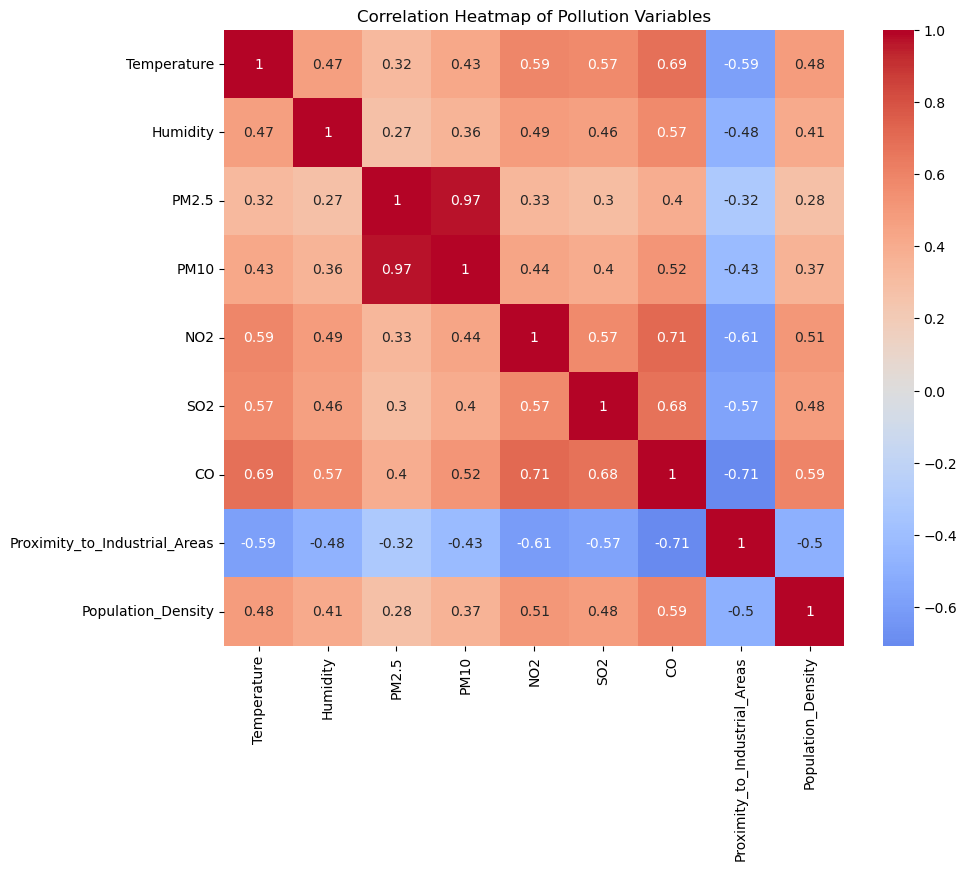

In [10]:
# CALCULATE CORRELATION MATRIX
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

# PLOT CORRELATION HEATMAP
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Pollution Variables")
plt.show()

In [12]:
print(len(df['Temperature']), len(df['CO']), len(df['Air Quality']))

# Check for NaNs or non-numeric in size
print(df['Temperature'].isnull().sum())
print(df['Temperature'].dtype)

# Convert to numeric if needed (and handle errors)
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')

# Drop rows with missing values in these columns (optional but recommended)
df_clean = df.dropna(subset=['Temperature', 'CO', 'Air Quality'])

5000 5000 5000
0
float64


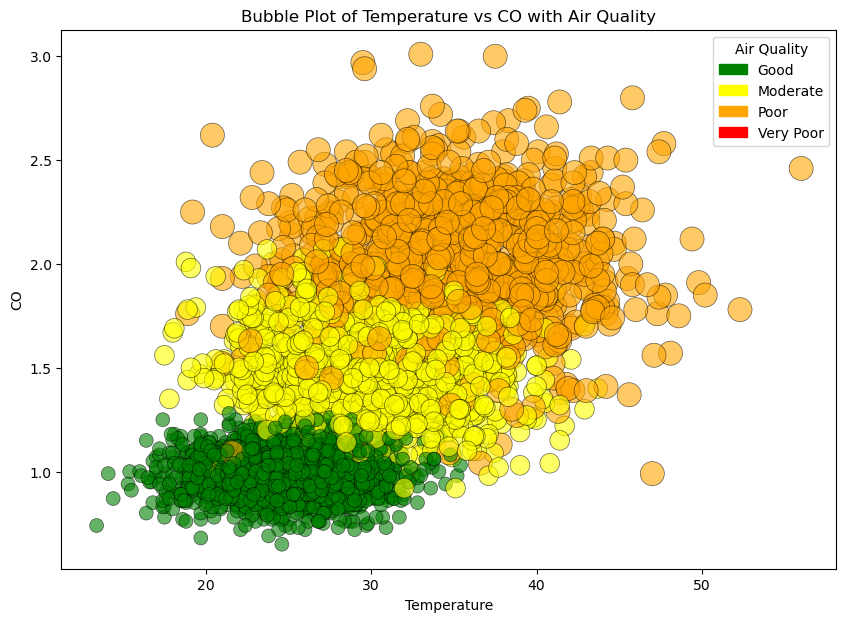

In [25]:
# BUBBLE PLOTS
x = df['Temperature']
y = df['CO']
size = df['Air Quality']

quality_map = {'Good': 1, 'Moderate': 2, 'Poor': 3, 'Very Poor': 4}
df['AirQualityNumeric'] = df['Air Quality'].map(quality_map)

# Map categories to colors
color_map = {'Good': 'green', 'Moderate': 'yellow', 'Poor': 'orange', 'Very Poor': 'red'}
df['AirQualityColor'] = df['Air Quality'].map(color_map)

df_clean = df.dropna(subset=['Temperature', 'CO', 'AirQualityNumeric', 'AirQualityColor'])

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df_clean['Temperature'],
    df_clean['CO'],
    s=df_clean['AirQualityNumeric'] * 100,  # size scaled by numeric mapping
    c=df_clean['AirQualityColor'],          # color by category
    alpha=0.6,
    edgecolor='k',
    linewidth=0.5
)

plt.xlabel('Temperature')
plt.ylabel('CO')
plt.title('Bubble Plot of Temperature vs CO with Air Quality')

import matplotlib.patches as mpatches

legend_handles = [mpatches.Patch(color=color, label=label) for label, color in color_map.items()]

plt.legend(handles=legend_handles, title='Air Quality')

plt.show()

In [27]:
# PCA
  # Clean / Standardize Data

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

numeric_df = df.select_dtypes(include=[np.number]).dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

In [28]:
pca = PCA()
pca.fit(scaled_data)

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# First Principal Component Direction (vector)
print("First PC vector:", pca.components_[0])

Explained variance ratio: [0.54106258 0.145383   0.06892341 0.06714972 0.05108433 0.0495862
 0.04136897 0.02661911 0.00723335 0.00158933]
First PC vector: [ 0.31242245  0.25543671  0.23133544  0.28320269  0.3232976   0.31453874
  0.38104465 -0.34738104  0.25995525  0.40807248]


In [30]:
# Project Data onto First Principal Component
pc1_projection = scaled_data.dot(pca.components_[0])

# Reconstruct Using ONLY First PC
reconstructed = np.outer(pc1_projection, pca.components_[0])

# Convert to DataFrame for Visualization
projected_df = pd.DataFrame(reconstructed, columns=numeric_df.columns)

print(f"The first principal component captures {explained_variance[0]:.2%} of the variance.")

The first principal component captures 54.11% of the variance.


In [31]:
# Linear Regression Analysis

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define Features and Target
X = numeric_df.drop(columns=['CO'])
y = numeric_df['CO']

model = LinearRegression()
model.fit(X, y)

# Predict and Evaluate
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared for predicting CO: {r2:.3f}")

R-squared for predicting CO: 0.806


In [32]:
# - Multiple Targets

for target in numeric_df.columns:
    X = numeric_df.drop(columns=[target])
    y = numeric_df[target]
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f"R-squared for predicting {target}: {r2:.3f}")

R-squared for predicting Temperature: 0.475
R-squared for predicting Humidity: 0.299
R-squared for predicting PM2.5: 0.965
R-squared for predicting PM10: 0.970
R-squared for predicting NO2: 0.521
R-squared for predicting SO2: 0.495
R-squared for predicting CO: 0.806
R-squared for predicting Proximity_to_Industrial_Areas: 0.621
R-squared for predicting Population_Density: 0.306
R-squared for predicting AirQualityNumeric: 0.913


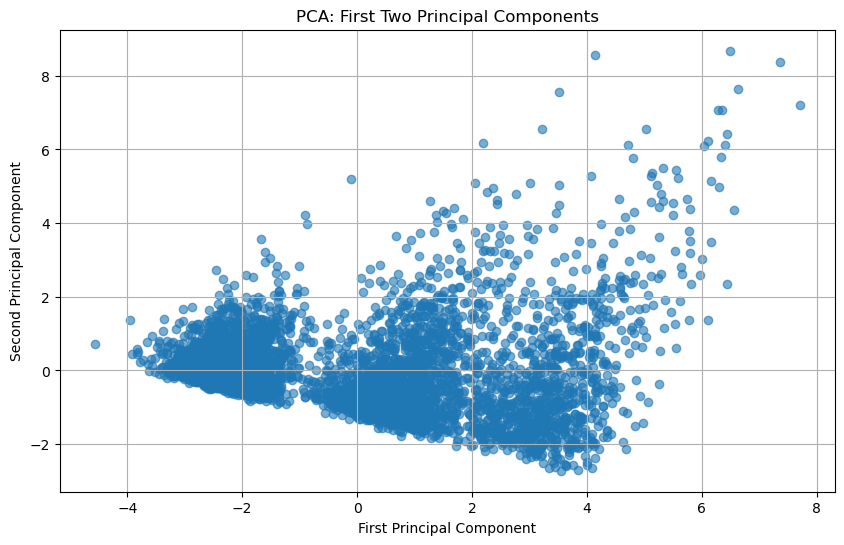

In [34]:
# Check for Outliers

import matplotlib.pyplot as plt

# Project Data Onto First 2 PCs
pc_scores = pca.transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pc_scores[:, 0], pc_scores[:, 1], alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Principal Components')
plt.grid(True)
plt.show()

Conclusions

1. Variance Captured by PC1: first principal component captures about 54.11% of the total variance. That suggests moderate redundancy among the variables.
2. Dimensionality Reduction: Yes, the data can be represented reasonably well using 1 or 2 principal components.
3. Outliers: Unusual in variables that mostly contribute to PC2 (often more volatile or less correlated pollutants)
4. Regression Usability: Predicting variable A from others gives a high R² score, but predicting B results in low R², suggesting limited linear predictability.
5. Data Quality: strong correlations present and usable; potentially need stronger dataset for solid modeling applications

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

In [35]:
data = pd.DataFrame({
    'Segment': ['Segment A', 'Segment B', 'Segment C', 'Segment D', 'Segment E'],
    'Percent': [34, 26, 18, 15, 7]
})

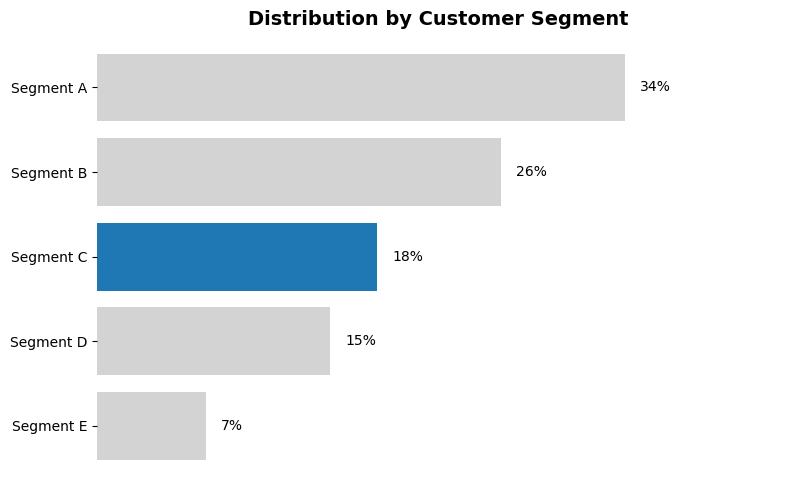

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort Data
data = data.sort_values('Percent', ascending=True)

highlight = 'Segment C'
colors = ['#d3d3d3' if seg != highlight else '#1f77b4' for seg in data['Segment']]

plt.figure(figsize=(8, 5))
bars = plt.barh(data['Segment'], data['Percent'], color=colors)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
             f'{width:.0f}%', va='center', fontsize=10)

plt.title('Distribution by Customer Segment', fontsize=14, weight='bold')
plt.xlim(0, max(data['Percent']) + 10)
plt.xticks([])  # No x-axis ticks
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()